## Assignment 3 (Data Science Tools and Techniqes, AM609)
## Reg. No: 24-14-20
## Name: Sunandan Sharma
## Course: M.Tech Modelling & Simulation

### Q1. Write a function that takes input (x,y) and returns MLE theta using Normal Equation. Use numpy in python to implement. Create a feature set x using linspace or np.random function and target values y. Call the function by passing these arguments and plot the predicted values against input data.

Enter the length of the dataset: 50
The paramenter values taken to create the simulated target from feature set:
Enter the array for parameters of the simulated data generation: [-1,2]
Enter the starting position of x (x1): 0
Enter the end position of x (x2): 10
The MSE Theta value obtained for the Linear Regression Model using Normal Equation
[[-0.66012521  1.9891035 ]]


Text(0, 0.5, 'Target Variable (Y)')

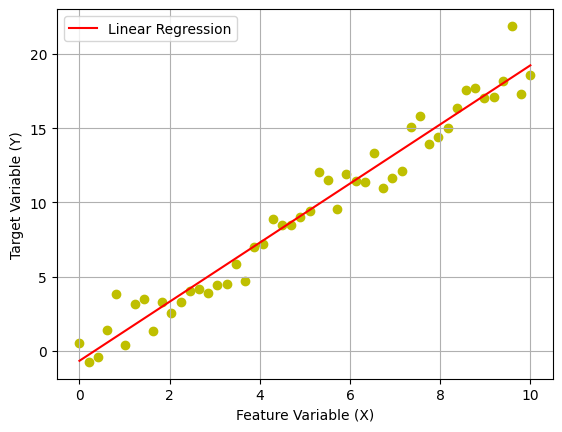

In [18]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True)

def MSE_theta(x,y,N=2):
    power = np.arange(N)
    x_1 =x**power
    x_transpose = x_1.T
    x_square = np.matmul(x_transpose,x_1)
    x_square_inv = np.linalg.inv(x_square)
    theta = np.dot(x_square_inv,np.dot(x_transpose,y))
    return [x_1,theta]

L = int(input("Enter the length of the dataset: "))

#Parameters for Data Generation
print("The paramenter values taken to create the simulated target from feature set:")

A = np.array(eval(input("Enter the array for parameters of the simulated data generation: ")))
N = len(A)
power = np.arange(N)
#Features
#x_simulated = 10*np.random.normal(size=(L,len(A)-1))
x1 = int(input("Enter the starting position of x (x1): "))
x2 = int(input("Enter the end position of x (x2): "))

x_simulated = np.array([np.linspace(x1,x2,num=L)]).T
signal = (np.dot(x_simulated**power,A.T))

#Target
y_simulated = (signal + np.random.normal(size=(1,L))).T

#Plotting The Datapoints
plt.scatter(x_simulated,y_simulated,color='y')

# MLE theta calculation using Normal Equation
theta_observed = MSE_theta(x_simulated,y_simulated)
print("The MSE Theta value obtained for the Linear Regression Model using Normal Equation")
print(theta_observed[1].T)

#Predicted Linear Regression Model
y_linearreg = np.dot(theta_observed[0],theta_observed[1])

# Plotting the Model
plt.plot(x_simulated,y_linearreg,'r',label="Linear Regression")
plt.grid()
plt.legend()
plt.xlabel('Feature Variable (X)')
plt.ylabel('Target Variable (Y)')

### Q2. Write a program to implement polynomial regression and compare it with the result obtained in the last question by plotting both the hypothesis.

Enter the degree of Polynomial regression: 9
The MSE Theta value obtained for the Polynomial Regression Model using Normal Equation
[[  0.18834594  -4.51676277  17.36351699 -17.1524975    8.19909193
   -2.17529646   0.33894313  -0.03095439   0.00153758  -0.00003214]]


Text(0, 0.5, 'Target Variable (Y)')

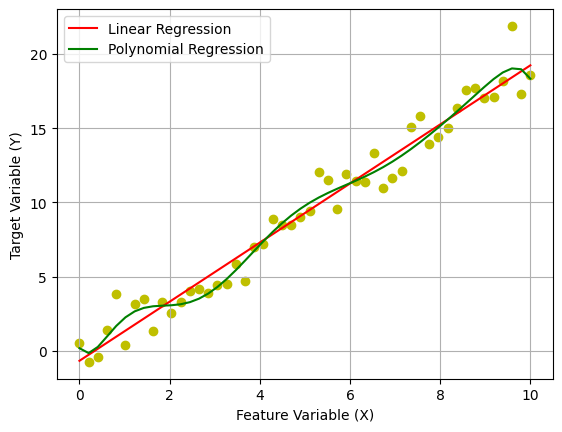

In [20]:
np.set_printoptions(suppress=True)
N = int(input("Enter the degree of Polynomial regression: "))

def MSE_theta_poly(x_simulated,y,N):
    power = np.arange(N)
    x = x_simulated**power
    x_transpose = x.T
    x_square = np.matmul(x_transpose,x)
    x_square_inv = np.linalg.inv(x_square)
    theta = np.dot(x_square_inv,np.dot(x_transpose,y))
    return np.array([x,theta],dtype='object')

plt.scatter(x_simulated,y_simulated,color='y')
# MLE theta calculation using Normal Equation
theta_observed_poly = MSE_theta_poly(x_simulated,y_simulated,N+1)
print("The MSE Theta value obtained for the Polynomial Regression Model using Normal Equation")
print(theta_observed_poly[1].T)

#Predicted Polynomial Regression Model
y_polyreg = np.dot(theta_observed_poly[0],theta_observed_poly[1])

# Plotting the Model
plt.plot(x_simulated,y_linearreg,'r',label="Linear Regression")
plt.plot(x_simulated,y_polyreg,'g',label="Polynomial Regression")
plt.grid()
plt.legend()
plt.xlabel('Feature Variable (X)')
plt.ylabel('Target Variable (Y)')

### Q3. Access the effects of outliers while training a linear regression by introducing some outliers in the data. Propose a solution how these outliers can be detected and removed before training the model. Implement the solution in python.

#### In the first phase we introduce outliers in the data by adding Salt-Pepper Like noise to the original data. This kind of noise is pretty common in case of image processing operation. This kind of noise produce extreme values in random interval. This kind of noise if not filtered will consequently result in sub optimal linear regression fit as shown below. 

Enter the proportion of Salt and Pepper noise in the simulated data:0.2


Text(0, 0.5, 'Target Variable (Y)')

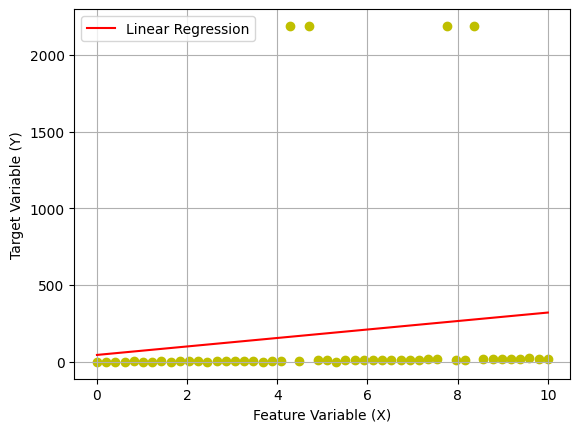

In [32]:
#Adding Salt-Pepper Noise to the Data
y_simulated_size = len(y_simulated)
noise_percentage = float(input("Enter the proportion of Salt and Pepper noise in the simulated data:"))
noise_size = int(noise_percentage*y_simulated_size)
random_indices = np.random.choice(y_simulated_size,noise_size)
y_simulated_sp_noise = y_simulated.copy()
noise = np.random.choice([y_simulated_sp_noise.min(),100*y_simulated_sp_noise.max()],noise_size)
y_simulated_sp_noise.flat[random_indices] = noise

#Linear Regression Parameter
theta_observed_sp_noise = MSE_theta(x_simulated,y_simulated_sp_noise)
y_linearreg_sp_noise = np.dot(theta_observed_sp_noise[0],theta_observed_sp_noise[1])

#Plotting
plt.scatter(x_simulated,y_simulated_sp_noise,color='y')
plt.plot(x_simulated,y_linearreg_sp_noise,'r',label="Linear Regression")
plt.grid()
plt.legend()
plt.xlabel('Feature Variable (X)')
plt.ylabel('Target Variable (Y)')

#### We observe due to presence of extreme level of sudden noise values the linear regression fit is totally different than what we expect (Even though number of such noise event is small compared to data due to their extreme values it skews the model fit).To detect and clean such noises from the data we must first do proper filtering. Here we use the Z-score method. Z-Score is defined as follows:

$$z_{score} = \frac{x - \mu}{\sigma}$$

#### Here $\mu$ is the mean and $\sigma$ is the standard deviation of the variable which we intend to filter out. We use a threshold value (In this case 3) to remove both upper and lower extremes from the data. The acceptance condition for the variable is as follows:

$$\mu - (z_{threshold}).\sigma \leq x \leq \mu + (z_{threshold}).\sigma$$

Text(0, 0.5, 'Target Variable (Y)')

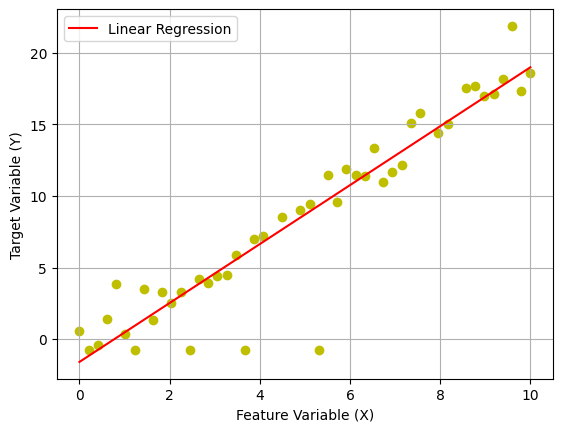

In [33]:
def filter_data_zscore(X, y, threshold=3):
    mean = np.mean(y)
    std_dev = np.std(y)
    z_scores = np.abs((y - mean) / std_dev)
    mask = z_scores <= threshold
    filtered_X = X[mask]
    filtered_y = y[mask]
    return filtered_X, filtered_y

x_copy = x_simulated.copy()
y_simulated_sp_noise_copy = y_simulated_sp_noise.copy()

filtered_X, filtered_y = filter_data_zscore(x_copy,y_simulated_sp_noise_copy)

theta_observed_clean = MSE_theta(np.array([filtered_X]).T,np.array([filtered_y]).T)
filtered_linearreg_fit = np.dot(theta_observed_clean[0],theta_observed_clean[1])

plt.scatter(filtered_X, filtered_y,color='y')
plt.plot(np.array([filtered_X]).T,filtered_linearreg_fit,'r',label="Linear Regression")
plt.grid()
plt.legend()
plt.xlabel('Feature Variable (X)')
plt.ylabel('Target Variable (Y)')

#### We observe after filtering out the extreme noise levels from the data we observe that filtered data is more similar to the original data (We still see some artifacts of outlier noises as they don't reach the threshold criteria for rejection). We plot the predicted values by the linear regression model in three cases (Original Data, Original Data with Salt and Pepper like noise and filtered data). We can readily see the impovement Z-Score based method has resulted in the following graph

Text(0, 0.5, 'Target Variable (Y):Log Scale')

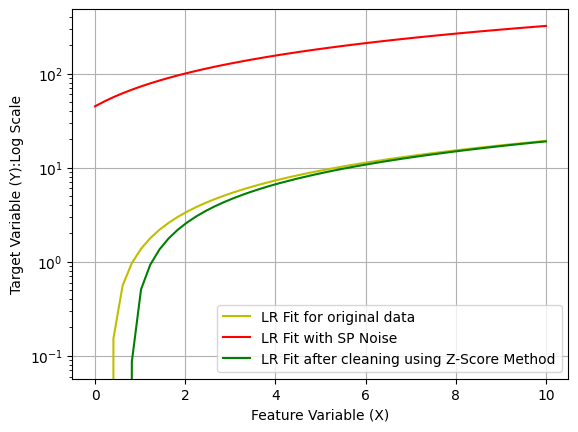

In [36]:
plt.plot(x_simulated,y_linearreg,'y',label="LR Fit for original data")
plt.plot(x_simulated,y_linearreg_sp_noise,'r',label="LR Fit with SP Noise")
plt.plot(np.array([filtered_X]).T,filtered_linearreg_fit,'g',label="LR Fit after cleaning using Z-Score Method")
plt.yscale('log')
plt.grid()
plt.legend()
plt.xlabel('Feature Variable (X)')
plt.ylabel('Target Variable (Y):Log Scale')

### Github Link: